In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
G_offset = 0.007 

V_resistor = np.array([0.000, 0.307, 0.628, 0.949, 1.258, 1.579, 1.900, 2.208, 2.530, 2.850, 3.275])
A_resistor = np.array([0.007, 0.036, 0.065, 0.095, 0.124, 0.156, 0.185, 0.214, 0.244, 0.274, 0.313])
A_resistor = A_resistor - G_offset
A_res_err = np.sqrt(0.001 ** 2 + (V_resistor * 0.01) ** 2)

G_offset = 0.007

V_in_green = np.array([0.000, 0.308, 0.631, 0.953, 1.262, 1.585, 1.907, 2.214, 2.528, 2.728, 2.941, 3.140, 3.230])
V_out_green = np.array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.067, 0.301, 0.471, 0.658, 0.837, 0.918])
V_green = V_in_green - V_out_green
A_green = np.array([0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.070, 0.288, 0.448, 0.622, 0.789, 0.865])
A_green = A_green - G_offset
A_green_err = np.sqrt(0.001 ** 2 + (V_green * 0.01) ** 2)

G_offset = 0.004

V_in_red = np.array([0.000, 0.308, 0.631, 0.953, 1.262, 1.365, 1.481, 1.584, 1.901, 2.101, 2.301, 2.514, 2.613, 2.824, 2.923])
V_out_red = np.array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.004, 0.161, 0.332, 0.514, 0.713, 0.807, 1.009, 1.105])
V_red = V_in_red - V_out_red
A_red = np.array([0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005, 0.009, 0.157, 0.318, 0.488, 0.674, 0.762, 0.951, 1.041])
A_red = A_red - G_offset
A_red_err = np.sqrt(0.001 ** 2 + (V_red * 0.01) ** 2)


In [3]:
def f_lin(x, m, b):
    return m * x + b

def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 


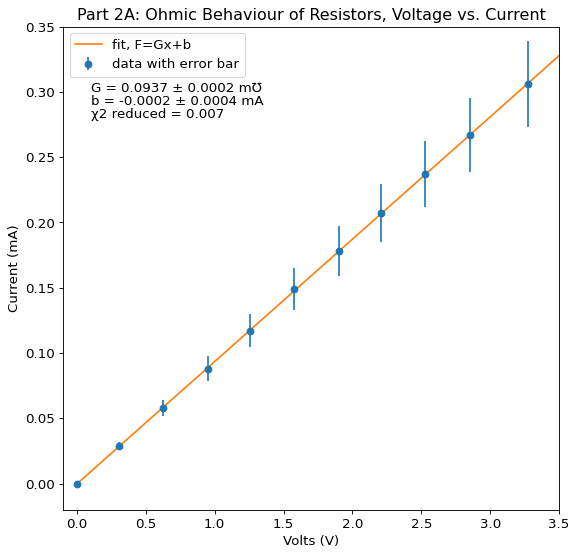

In [8]:
# Does the fit
lin_opt, lin_cov = opt.curve_fit(f_lin, V_resistor, A_resistor)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(V_resistor, A_resistor, yerr=A_res_err, label="data with error bar", fmt='o')
plt.plot(np.linspace(0,10), f_lin(np.linspace(0,10), m, b), label='fit, F=Gx+b', color='tab:orange')

res = norm_res(f_lin(V_resistor, m, b), A_resistor, A_res_err)
chi_sq = np.sum(res ** 2)
red_chi_sq = chi_sq / (len(V_resistor - 2))

plt.title("Part 2A: Ohmic Behaviour of Resistors, Voltage vs. Current")
plt.xlabel("Volts (V)")
plt.ylabel("Current (mA)")

plt.text(0.1,0.3, "G = %5.4f \u00b1 %5.4f m℧" % (m, dm))
plt.text(0.1,0.29, "b = %5.4f \u00b1 %5.4f mA" % (b, db))
plt.text(0.1,0.28, "χ2 reduced = %5.3f" % red_chi_sq)
plt.xlim(-0.1,3.5)
plt.ylim(-0.02,0.35)
plt.legend()
plt.show()

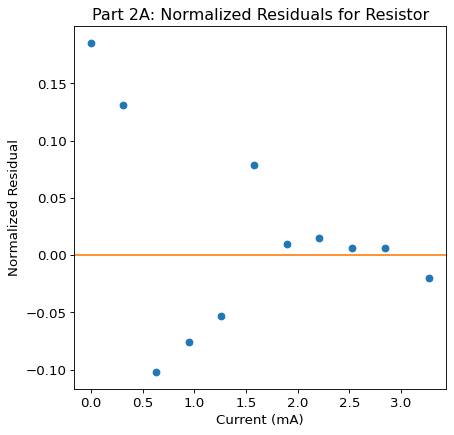

In [5]:
# Plotting residuals time!

fig2=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(V_resistor, res, fmt='o')
plt.axhline(color='tab:orange')

plt.title("Part 2A: Normalized Residuals for Resistor")
plt.xlabel("Current (mA)")
plt.ylabel("Normalized Residual")
plt.show()


In [9]:
1/m

10.673731412199858

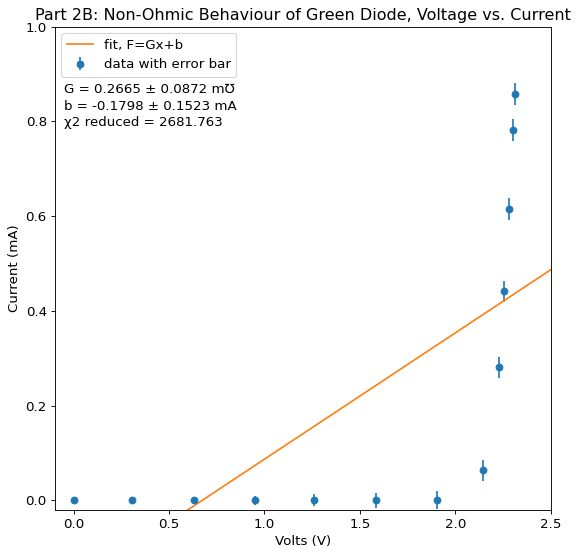

In [14]:
# Does the fit
lin_opt, lin_cov = opt.curve_fit(f_lin, V_green, A_green)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(V_green, A_green, yerr=A_green_err, label="data with error bar", fmt='o')
plt.plot(np.linspace(0,10), f_lin(np.linspace(0,10), m, b), label='fit, F=Gx+b', color='tab:orange')


res = norm_res(f_lin(V_green, m, b), A_green, A_green_err)
chi_sq = np.sum(res ** 2)
red_chi_sq = chi_sq / (len(V_green - 2))

plt.title("Part 2B: Non-Ohmic Behaviour of Green Diode, Voltage vs. Current")
plt.xlabel("Volts (V)")
plt.ylabel("Current (mA)")

plt.text(-0.05,0.86, "G = %5.4f \u00b1 %5.4f m℧" % (m, dm))
plt.text(-0.05,0.825, "b = %5.4f \u00b1 %5.4f mA" % (b, db))
plt.text(-0.05,0.79, "χ2 reduced = %5.3f" % red_chi_sq)
plt.xlim(-0.1,2.5)
plt.ylim(-0.02,1)
plt.legend(loc=2)
plt.show()

In [24]:
print("ohms is " + str(1000 / m) + "±" + str(dm * 1000 / m ** 2))

ohms is 3752.2610937361524±1227.6004408570077


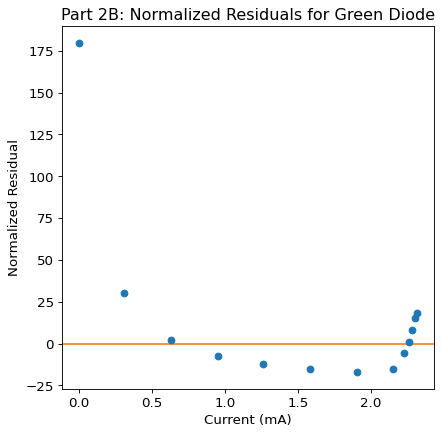

In [7]:
# Plotting residuals time!

fig2=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(V_green, res, fmt='o')
plt.axhline(color='tab:orange')

plt.title("Part 2B: Normalized Residuals for Green Diode")
plt.xlabel("Current (mA)")
plt.ylabel("Normalized Residual")
plt.show()


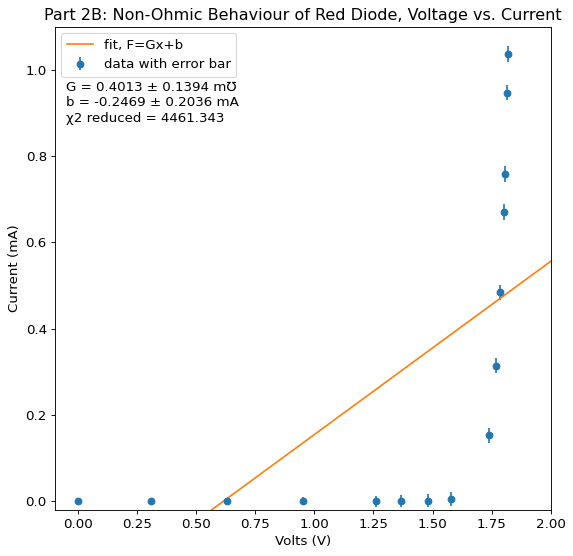

In [25]:
# Does the fit
lin_opt, lin_cov = opt.curve_fit(f_lin, V_red, A_red)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(V_red, A_red, yerr=A_red_err, label="data with error bar", fmt='o')
plt.plot(np.linspace(0,10), f_lin(np.linspace(0,10), m, b), label='fit, F=Gx+b', color='tab:orange')


res = norm_res(f_lin(V_red, m, b), A_red, A_red_err)
chi_sq = np.sum(res ** 2)
red_chi_sq = chi_sq / (len(V_red - 2))



plt.title("Part 2B: Non-Ohmic Behaviour of Red Diode, Voltage vs. Current")
plt.xlabel("Volts (V)")
plt.ylabel("Current (mA)")

plt.text(-0.05,0.95, "G = %5.4f \u00b1 %5.4f m℧" % (m, dm))
plt.text(-0.05,0.915, "b = %5.4f \u00b1 %5.4f mA" % (b, db))
plt.text(-0.05,0.88, "χ2 reduced = %5.3f" % red_chi_sq)
plt.xlim(-0.1,2)
plt.ylim(-0.02,1.1)
plt.legend(loc=2)
plt.show()


In [26]:
print("ohms is " + str(1000 / m) + "±" + str(dm * 1000 / m ** 2))

ohms is 2491.7998193131716±865.5889865703094


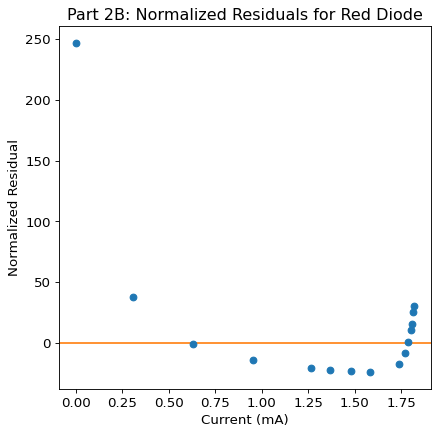

In [9]:
# Plotting residuals time!

fig2=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(V_red, res, fmt='o')
plt.axhline(color='tab:orange')

plt.title("Part 2B: Normalized Residuals for Red Diode")
plt.xlabel("Current (mA)")
plt.ylabel("Normalized Residual")
plt.show()



In [ ]:
A_res_err

array([0.001     , 0.00322876, 0.00635912, 0.00954254, 0.01261968,
       0.01582163, 0.0190263 , 0.02210263, 0.02531976, 0.02851754,
       0.03276526])

In [ ]:
A_green_err

array([0.001     , 0.00323827, 0.00638875, 0.00958232, 0.01265956,
       0.01588151, 0.0190962 , 0.02149328, 0.02229244, 0.02259214,
       0.02285189, 0.0230517 , 0.02314162])